In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#sklearn imports
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, plot_confusion_matrix

#custom imports
import acquire

#filter out any noisy warning flags
import warnings
warnings.filterwarnings('ignore')

# 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
df = acquire.get_titanic_data()

In [3]:
#take a look
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
train, validate, test = acquire.prep_titanic_data(df)

In [5]:
train.shape, validate.shape, test.shape


((498, 10), (214, 10), (179, 10))

In [6]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,1,1,29.678105,0,0,110.8833,1,0,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   age                      498 non-null    float64
 3   sibsp                    498 non-null    int64  
 4   parch                    498 non-null    int64  
 5   fare                     498 non-null    float64
 6   alone                    498 non-null    int64  
 7   sex_male                 498 non-null    uint8  
 8   embark_town_Queenstown   498 non-null    uint8  
 9   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 32.6 KB


In [8]:
# What is our target? survived
# In order to determine the mode, let's pull a value count
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

Most common class is 0, which means did not survive, this will be our baseline.

In [9]:
X_train = train.drop(columns='survived')
y_train = train.survived

X_val = validate.drop(columns='survived')
y_val = validate.survived

X_test = test.drop(columns='survived')
y_test = test.survived

In [10]:
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


# 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   498 non-null    int64  
 1   age                      498 non-null    float64
 2   sibsp                    498 non-null    int64  
 3   parch                    498 non-null    int64  
 4   fare                     498 non-null    float64
 5   alone                    498 non-null    int64  
 6   sex_male                 498 non-null    uint8  
 7   embark_town_Queenstown   498 non-null    uint8  
 8   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 28.7 KB


In [12]:
X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,36.000000,0,0,40.1250,1,1,0,0
165,3,9.000000,0,2,20.5250,0,1,0,1
50,3,7.000000,4,1,39.6875,0,1,0,1
259,2,50.000000,0,1,26.0000,0,0,0,1
306,1,29.678105,0,0,110.8833,1,0,0,0


In [13]:
# make the model

In [14]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=1349)

In [15]:
# fit the model
tree1 = tree1.fit(X_train, y_train)

In [16]:
# use
y_predictions = tree1.predict(X_train)

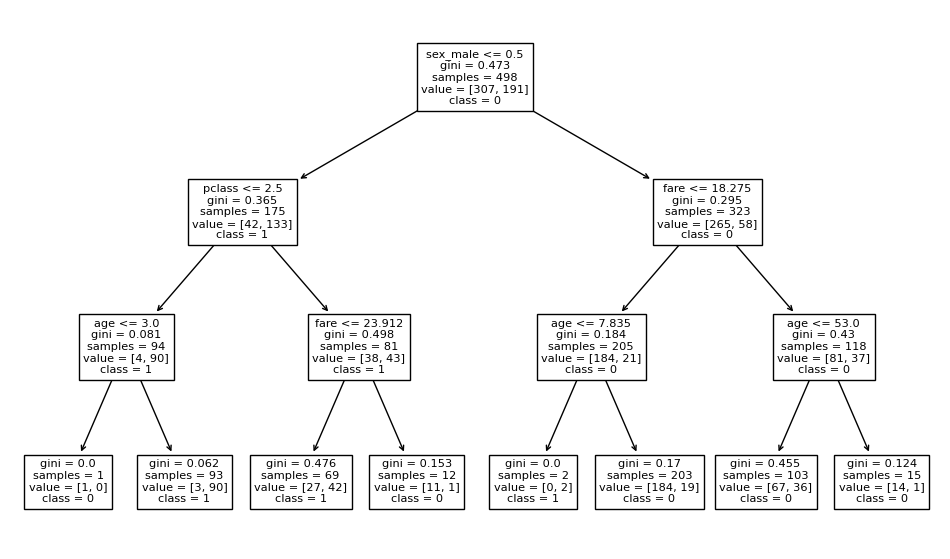

In [17]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

# 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [18]:
acc = tree1.score(X_train, y_train)
acc

0.8253012048192772

In [19]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


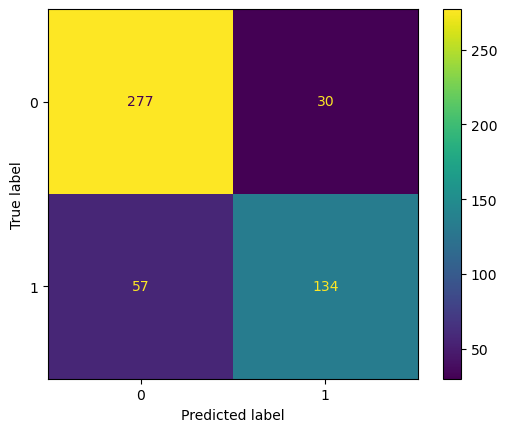

In [20]:
plot_confusion_matrix(tree1, X_train, y_train)


In [21]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [22]:
report = classification_report(y_train, y_predictions, output_dict=True)
report

{'0': {'precision': 0.8293413173652695,
  'recall': 0.9022801302931596,
  'f1-score': 0.8642745709828392,
  'support': 307},
 '1': {'precision': 0.8170731707317073,
  'recall': 0.7015706806282722,
  'f1-score': 0.7549295774647887,
  'support': 191},
 'accuracy': 0.8253012048192772,
 'macro avg': {'precision': 0.8232072440484883,
  'recall': 0.8019254054607159,
  'f1-score': 0.8096020742238139,
  'support': 498},
 'weighted avg': {'precision': 0.8246360643391443,
  'recall': 0.8253012048192772,
  'f1-score': 0.8223370333082455,
  'support': 498}}

In [23]:
print("Tree of 1 depth")
pd.DataFrame(report).T

Tree of 1 depth


,precision,recall,f1-score,support
0,0.829341,0.902280,0.864275,307.000000
1,0.817073,0.701571,0.754930,191.000000
accuracy,0.825301,0.825301,0.825301,0.825301
macro avg,0.823207,0.801925,0.809602,498.000000
weighted avg,0.824636,0.825301,0.822337,498.000000


# 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [24]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP

(277, 30, 57, 134)

In [25]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


In [26]:
# accuracy
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
# true positive rate, also recall
TPR = recall = TP/ (TP + FN)
# false positive rate
FPR = FP / (FP + TN)
# true negative rate
TNR = TN / (TN + FP)
# false negative rate
FNR = FN / (FN + TP)
# precision
precision = TP / (TP + FP)
# f1
f1_score = 2 * (precision*recall) / (precision+recall)
# support
support_pos = TP + FN
support_neg = FP + TN

# 5. Run through steps 2-4 using a different max_depth value.

In [27]:
# making a loop to speed up the process of making the models.
for i in range(1, 21):
    # Make the model
    trees = DecisionTreeClassifier(max_depth=i, random_state=1349)

    # Fit the model (on train and only train)
    trees = trees.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = trees.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     

When our models max depth is 15 or over, the accuracy is the bust, but its maybe not the best model.


# 6. Which model performs better on your in-sample data?

models with 15+ max depth preform with the highest accuracymetrics = []


# 7. Which model performs best on your out-of-sample data, the validate set?

In [28]:
metrics = []

for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_val, y_val)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
4,5,0.853414,0.799065,0.054348
5,6,0.865462,0.789720,0.075742
6,7,0.885542,0.780374,0.105168
7,8,0.897590,0.799065,0.098525
8,9,0.921687,0.794393,0.127294
9,10,0.933735,0.794393,0.139342


models with a depth of 14+ have the highest accuracy but how does that compare to the validate data?

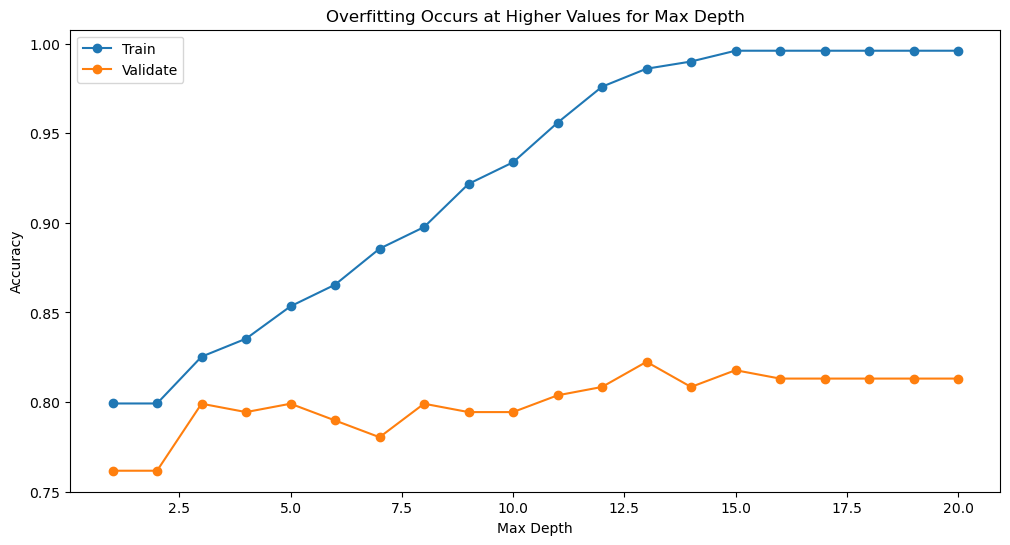

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
# leta not look at any model with a defference over .1
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
2,3,0.825301,0.799065,0.026236
4,5,0.853414,0.799065,0.054348
7,8,0.897590,0.799065,0.098525
3,4,0.835341,0.794393,0.040949
5,6,0.865462,0.789720,0.075742
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515


In [31]:
# max depth of 3, 5, 8 have the same validity accuracy, so lets take the model with the least difference.
# the model with a max dept of 3 will be our best model.

# ----------------------------------

# 1. Work through these same exercises using the Telco dataset.


In [32]:
telco = acquire.get_telco_data()

In [33]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [35]:
telco.TotalCharges.value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64

In [36]:
def split_telco_data(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=1349, 
                                        stratify=df.Churn)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=1349, 
                                   stratify=train_validate.Churn)
    return train, validate, test

In [37]:
def prep_telco(df):
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df = df.drop(columns=['InternetService', 'Contract', 'PaymentMethod'])
    df['gender'] = df.gender.map({'Female': 1, 'Male': 0})
    df['Partner'] = df.Partner.map({'Yes': 1, 'No': 0})
    df['Dependents'] = df.Dependents.map({'Yes': 1, 'No': 0})
    df['PhoneService'] = df.PhoneService.map({'Yes': 1, 'No': 0})
    df['PaperlessBilling'] = df.PaperlessBilling.map({'Yes': 1, 'No': 0})
    df.TotalCharges.fillna('20.20',inplace=True)
    df['Churn'] = df.Churn.map({'Yes': 1, 'No': 0})
    dummy_df = pd.get_dummies(df[['MultipleLines', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']],
                              drop_first=True)
    df = df.drop(columns=['MultipleLines', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])
    df = pd.concat([df, dummy_df], axis=1)
    
    # split the data
    train, validate, test = split_telco_data(df)
    
    return train, validate, test

In [38]:
train, val, test = prep_telco(telco)

In [39]:
train.shape, val.shape, test.shape


((3943, 24), (1691, 24), (1409, 24))

In [40]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
1116-DXXDF,0,0,0,0,39,1,1,100.45,3801.7,0,...,0,0,0,1,0,0,0,1,0,1
5605-IYGFG,1,0,0,0,7,1,1,69.85,515.45,0,...,0,0,0,0,0,0,0,0,0,0
1066-JKSGK,0,0,0,0,1,1,0,20.15,20.15,1,...,1,0,1,0,1,0,1,0,1,0
9099-FTUHS,1,0,0,0,23,1,0,54.40,1249.25,0,...,0,0,0,0,0,0,0,0,0,0
5227-JSCFE,0,1,1,0,71,0,0,46.35,3353.4,0,...,0,1,0,1,0,1,0,0,0,0


In [41]:
val.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
8612-GXIDD,0,0,1,1,12,1,1,25.40,313.0,0,...,1,0,1,0,1,0,1,0,1,0
8417-FMLZI,0,0,1,1,6,1,1,83.55,477.55,1,...,0,1,0,0,0,0,0,0,0,1
0722-TROQR,1,1,0,0,4,1,1,74.90,321.75,1,...,0,0,0,0,0,0,0,0,0,0
8242-JSVBO,0,0,0,0,7,1,1,44.65,322.5,0,...,0,0,0,0,0,0,0,0,0,0
5171-EPLKN,0,0,0,0,27,1,0,19.85,470.0,0,...,1,0,1,0,1,0,1,0,1,0


In [42]:
X_train = train.drop(columns='Churn')
y_train = train.Churn

X_val = val.drop(columns='Churn')
y_val = val.Churn

X_test = test.drop(columns='Churn')
y_test = test.Churn

In [43]:
# create baseline

In [44]:
train.Churn.value_counts()

0    2897
1    1046
Name: Churn, dtype: int64

In [45]:
# create model
churn_tree1 = DecisionTreeClassifier(max_depth=3, random_state=1349)

In [46]:
churn_tree1 = churn_tree1.fit(X_train, y_train)

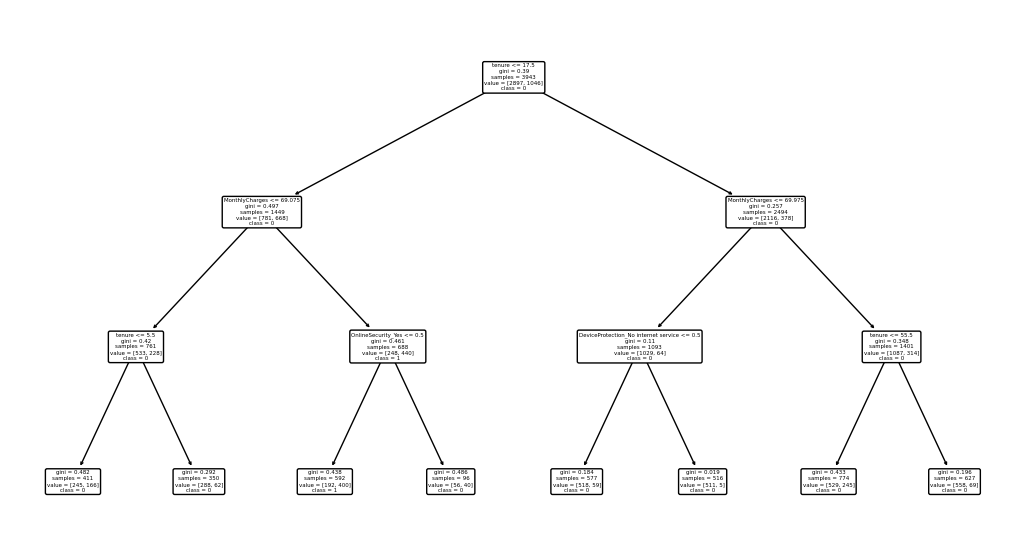

In [47]:
plt.figure(figsize=(13, 7))
plot_tree(churn_tree1, feature_names=X_train.columns, 
class_names = np.array(churn_tree1.classes_).astype('str').tolist(), rounded=True)
plt.show()

In [48]:
accuracy = churn_tree1.score(X_train, y_train)
print(f'Model 1 accuracy: {accuracy:.2%}')

Model 1 accuracy: 78.75%


In [49]:
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 73.47%


In [50]:
# create a loop for models. much faster

In [53]:
metrics = []

for i in range(1, 25):
    # Make the model
    churn_trees = DecisionTreeClassifier(max_depth=i, random_state=1349)

    # Fit the model (on train and only train)
    churn_trees = churn_trees.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = churn_trees.score(X_train, y_train)
    
    out_of_sample_accuracy = churn_trees.score(X_val, y_val)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734720,0.734477,0.000243
1,2,0.783414,0.782969,0.000445
2,3,0.787471,0.785334,0.002137
3,4,0.791022,0.790656,0.000366
4,5,0.797616,0.788291,0.009325
5,6,0.810043,0.774098,0.035945
6,7,0.821963,0.769367,0.052596
7,8,0.839970,0.761088,0.078881
8,9,0.861527,0.764045,0.097482
9,10,0.881055,0.756949,0.124106


max depth 23 and 24  performed best with accuracy, but its much to overfit

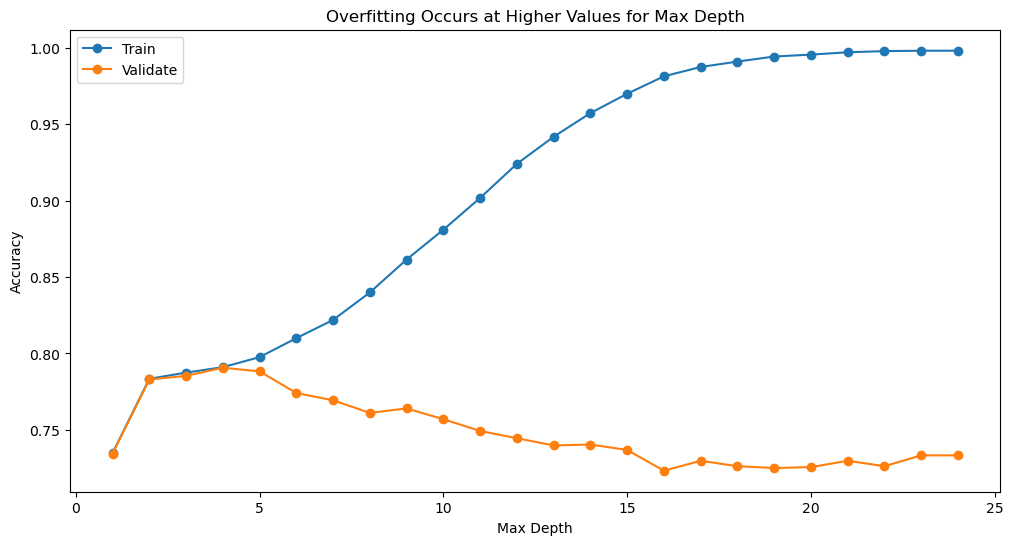

In [54]:
# visualize
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


,max_depth,train_accuracy,validate_accuracy,difference
3,4,0.791022,0.790656,0.000366
4,5,0.797616,0.788291,0.009325
2,3,0.787471,0.785334,0.002137
1,2,0.783414,0.782969,0.000445
5,6,0.810043,0.774098,0.035945
6,7,0.821963,0.769367,0.052596
8,9,0.861527,0.764045,0.097482
7,8,0.839970,0.761088,0.078881
0,1,0.734720,0.734477,0.000243


max depth of 4 is our best option

In [56]:
churn_tree2 = DecisionTreeClassifier(max_depth=4, random_state=1349)

In [57]:
churn_tree2 = churn_tree2.fit(X_train, y_train)

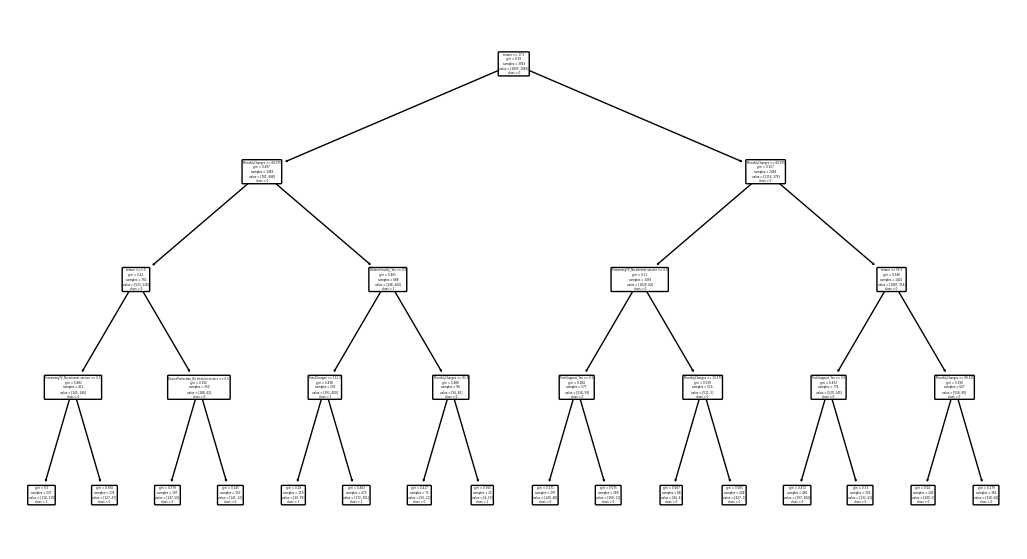

In [58]:
plt.figure(figsize=(13, 7))
plot_tree(churn_tree2, feature_names=X_train.columns, 
class_names = np.array(churn_tree2.classes_).astype('str').tolist(), rounded=True)
plt.show()
